## Download Historical Data About Various Coins

In [1]:
import yfinance as yf

yf_data = yf.download(['ADA-USD', 'BNB-USD', 'BTC-USD', 'ETH-USD','XRP-USD','DOT-USD','MATIC-USD','SOL-USD'],
                      start='2016-01-01')
yf_data

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[*********************100%***********************]  8 of 8 completed


Price      Adj Close                                                    \
Ticker       ADA-USD     BNB-USD        BTC-USD   DOT-USD      ETH-USD   
Date                                                                     
2016-01-01       NaN         NaN     434.334015       NaN          NaN   
2016-01-02       NaN         NaN     433.437988       NaN          NaN   
2016-01-03       NaN         NaN     430.010986       NaN          NaN   
2016-01-04       NaN         NaN     433.091003       NaN          NaN   
2016-01-05       NaN         NaN     431.959991       NaN          NaN   
...              ...         ...            ...       ...          ...   
2025-01-03  1.090376  713.643555   98107.429688  7.747455  3605.009766   
2025-01-04  1.071400  713.841187   98236.226562  7.684382  3657.706787   
2025-01-05  1.093467  709.258301   98314.960938  7.679115  3634.103760   
2025-01-06  1.094124  729.400085  102078.085938  7.766676  3688.611328   
2025-01-07  1.001779  695.975403   97049.273438  7.065987  3387.161621   

Price                                          Close              ...  \
Ticker     MATIC-USD     SOL-USD   XRP-USD   ADA-USD     BNB-USD  ...   
Date                                                              ...   
2016-01-01       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-02       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-03       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-04       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-05       NaN         NaN       NaN       NaN         NaN  ...   
...              ...         ...       ...       ...         ...  ...   
2025-01-03  0.518211  217.747330  2.452896  1.090376  713.643555  ...   
2025-01-04  0.523265  216.622925  2.419595  1.071400  713.841187  ...   
2025-01-05  0.516061  213.393631  2.399727  1.093467  709.258301  ...   
2025-01-06  0.523440  218.723129  2.418807  1.094124  729.400085  ...   
2025-01-07  0.471357  203.212479  2.290269  1.001779  695.975403  ...   

Price             Open                  Volume                             \
Ticker         SOL-USD   XRP-USD       ADA-USD       BNB-USD      BTC-USD   
Date                                                                        
2016-01-01         NaN       NaN           NaN           NaN     36278900   
2016-01-02         NaN       NaN           NaN           NaN     30096600   
2016-01-03         NaN       NaN           NaN           NaN     39633800   
2016-01-04         NaN       NaN           NaN           NaN     38477500   
2016-01-05         NaN       NaN           NaN           NaN     34522600   
...                ...       ...           ...           ...          ...   
2025-01-03  207.767609  2.403375  2.503147e+09  1.822244e+09  35611391163   
2025-01-04  217.748047  2.452897  1.175731e+09  1.524500e+09  22342608078   
2025-01-05  216.622757  2.419580  1.241264e+09  1.411809e+09  20525254825   
2025-01-06  213.394836  2.399726  1.303664e+09  2.056634e+09  51823432705   
2025-01-07  218.370560  2.418866  2.229157e+09  2.219699e+09  58312904704   

Price                                                                         
Ticker          DOT-USD       ETH-USD  MATIC-USD       SOL-USD       XRP-USD  
Date                                                                          
2016-01-01          NaN           NaN        NaN           NaN           NaN  
2016-01-02          NaN           NaN        NaN           NaN           NaN  
2016-01-03          NaN           NaN        NaN           NaN           NaN  
2016-01-04          NaN           NaN        NaN           NaN           NaN  
2016-01-05          NaN           NaN        NaN           NaN           NaN  
...                 ...           ...        ...           ...           ...  
2025-01-03  492168497.0  2.187730e+10  6055402.0  4.064421e+09  5.804528e+09  
2025-01-04  282573463.0  1.606061e+10  5163695.0  2.432220e+09  4.39598

In [2]:
from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd

univ = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT','DOTUSDT','MATICUSDT','SOLUSDT']

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in univ:
        px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
        print(f"Downloaded data for {coin}.")
    
    return px_data

In [3]:
px_data = get_price_data_for_universe('4h', '2020-01-01')
px_data['BTCUSDT']

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for ADAUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XRPUSDT.
Downloaded data for DOTUSDT.
Downloaded data for MATICUSDT.
Downloaded data for SOLUSDT.


,open,high,low,close,volume,close_time,quote_volume,num_trades,taker_base_volume,taker_quote_volume,ignore
open_time,,,,,,,,,,,
2020-01-01 00:00:00,7180.46000000,7238.03000000,7175.62000000,7230.71000000,12.76044500,2020-01-01 03:59:59.999,92038.71492464,136,6.77459900,48856.54532507,0
2020-01-01 04:00:00,7226.19000000,7231.70000000,7196.20000000,7205.50000000,1.11132000,2020-01-01 07:59:59.999,8019.12142380,64,0.51825300,3740.42331552,0
2020-01-01 08:00:00,7209.50000000,7231.17000000,7181.17000000,7195.80000000,2.09735800,2020-01-01 11:59:59.999,15104.19833234,61,1.10531000,7957.89489576,0
2020-01-01 12:00:00,7193.32000000,7244.43000000,7193.32000000,7233.02000000,7.53150600,2020-01-01 15:59:59.999,54379.11998954,111,4.23535400,30569.13569131,0
2020-01-01 16:00:00,7237.54000000,7245.54000000,7215.51000000,7223.72000000,5.49440100,2020-01-01 19:59:59.999,39733.51835241,80,2.65822100,19232.35402975,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-07 04:00:00,101594.71000000,101993.01000000,101588.61000000,101736.11000000,2.71118000,2025-01-07 07:59:59.999,275753.10199280,233,0.47556000,48394.43365300,0
2025-01-07 08:00:00,101762.95000000,101978.47000000,100543.33000000,100636.88000000,2.71753000,2025-01-07 11:59:59.999,275618.48354850,406,0.56246000,57114.28541910,0
2025-01-07 12:00:00,100854.82000000,100926.54000000,97239.32000000,97944.01000000,4.83777000,2025-01-07 15:59:59.999,479546.91890530,1062,0.74434000,73976.34133520,0


In [4]:
px = {}

for coin in px_data:
    px[coin] = px_data[coin]["close"]

px_df = pd.DataFrame(px).astype(float)
px_df = px_df.reindex(pd.date_range(px_df.index[0],px_df.index[-1],freq='4h'))
px_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,7230.71,130.18,0.03308,13.8159,0.19406,NaN,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.03320,13.7648,0.19518,NaN,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.03321,13.7162,0.19358,NaN,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.03357,13.7958,0.19428,NaN,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.03361,13.7270,0.19474,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-07 04:00:00,101736.11,3668.62,1.10200,727.1300,2.42960,7.761,0.5147,216.05
2025-01-07 08:00:00,100636.88,3629.68,1.13130,724.6000,2.41850,7.717,0.5132,214.46
2025-01-07 12:00:00,97944.01,3474.81,1.05030,708.8100,2.32340,7.342,0.4832,208.19
2025-01-07 16:00:00,96643.93,3383.49,1.01150,695.3400,2.27250,7.112,0.4754,205.18


In [5]:
ret = px_df / px_df.shift() - 1
ret

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.003487,0.002612,0.003628,-0.003699,0.005771,NaN,NaN,NaN
2020-01-01 08:00:00,-0.001346,0.002452,0.000301,-0.003531,-0.008198,NaN,NaN,NaN
2020-01-01 12:00:00,0.005172,0.007643,0.010840,0.005803,0.003616,NaN,NaN,NaN
2020-01-01 16:00:00,-0.001286,0.001062,0.001192,-0.004987,0.002368,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-07 04:00:00,0.000271,-0.002870,0.012495,0.000385,0.012249,0.004400,-0.005987,-0.005111
2025-01-07 08:00:00,-0.010805,-0.010614,0.026588,-0.003479,-0.004569,-0.005669,-0.002914,-0.007359
2025-01-07 12:00:00,-0.026758,-0.042668,-0.071599,-0.021791,-0.039322,-0.048594,-0.058457,-0.029236
2025-01-07 16:00:00,-0.013274,-0.026281,-0.036942,-0.019004,-0.021908,-0.031327,-0.016142,-0.014458


### Convenience Functions

In [6]:
# Calculate net returns when taking into account transaction costs. We assume transaction costs of 20 bps per
# share of turnover representing the sum of commissions to brokers and slippage paid to market makers. We
# ignore the fixed cost of the bid-ask spread also normally paid to market makers (assuming this is only about
# 1 bp in general).

def get_net_return(strat_holdings, ret):
    # assume that strat_holdings have already been shifted back in time to avoid look-ahead bias.
    gross_ret = (strat_holdings * ret).sum(axis=1)
    
    turnover = (strat_holdings.fillna(0) - strat_holdings.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20
    return gross_ret.subtract(turnover * tcost_bps * 1e-4, fill_value=0)

## Strategy 1: Testing Different Time Horizons For Momentum And Reversal -- All Coins

In [7]:
# Look at a rolling window of the immediately preceding average return for
# different granularities and trade based on the 
# ranked-demeaned-normalized values. Viewing this as a momentum strategy, 
# we long the coins in the top 50% and short the coins in the bottom 50%
# over the window. (All coins are included.)

In [8]:
def get_strat_1_holdings():
    strat_1_holdings = dict()

    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        period_mean_returns = ret.rolling(window=t, min_periods=1).mean()

        ranked_ret = period_mean_returns.rank(axis=1)
        ranked_demeaned_ret = ranked_ret.subtract(ranked_ret.mean(axis=1), axis=0)
        ranked_demeaned_normalized_ret = ranked_demeaned_ret.divide(ranked_demeaned_ret.abs().sum(axis=1), axis=0)
        
        # shift the holdings to use information from the previous days to avoid look-ahead bias
        strat_1_holdings[t] = ranked_demeaned_normalized_ret.shift()
    
    return strat_1_holdings

In [9]:
strat_1_holdings = get_strat_1_holdings()
strat_1_holdings[6]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-07 04:00:00,0.218750,0.031250,-0.031250,0.156250,-0.093750,-0.21875,-0.15625,0.09375
2025-01-07 08:00:00,0.218750,-0.093750,0.156250,0.093750,0.031250,-0.03125,-0.21875,-0.15625
2025-01-07 12:00:00,0.156250,-0.093750,0.218750,0.031250,0.093750,-0.03125,-0.15625,-0.21875
2025-01-07 16:00:00,0.093750,-0.093750,0.156250,0.218750,0.031250,-0.15625,-0.21875,-0.03125


In [10]:
def get_strat_1_gross_returns(strat_1_holdings, ret):
    strat_1_ret = dict()
    for t in strat_1_holdings.keys():
        strat_1_ret[t] = (strat_1_holdings[t] * ret).sum(axis=1)
    
    return pd.DataFrame(strat_1_ret)


strat_1_gross_ret = get_strat_1_gross_returns(strat_1_holdings, ret)
strat_1_gross_ret * 365

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579
2020-01-01 12:00:00,0.796335,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596
2020-01-01 16:00:00,-0.000285,0.224874,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542
...,...,...,...,...,...,...,...,...,...
2025-01-07 04:00:00,-0.737586,-0.316071,-0.605116,-1.227276,-0.980157,-0.735628,1.160752,-1.795419,-0.054082
2025-01-07 08:00:00,2.767503,2.767503,-0.154833,2.266347,1.537920,1.562768,-1.342165,1.060504,0.845352
2025-01-07 12:00:00,-4.120210,-3.214164,-1.159231,-0.661103,-2.236083,-1.154397,-1.114670,-1.248762,-2.196294
2025-01-07 16:00:00,2.222957,1.350148,-0.157696,-0.500665,0.694306,-0.188593,1.220204,0.651996,0.872132


In [11]:
def get_strat_1_net_returns(strat_1_holdings, ret):
    #get_net_return(strat_holdings, ret)
    strat_1_net_ret = dict()
    for t in strat_1_holdings.keys():
        strat_1_net_ret[t] = get_net_return(strat_1_holdings[t], ret)
    
    return pd.DataFrame(strat_1_net_ret)

strat_1_gross_daily_ret = get_strat_1_gross_returns(strat_1_holdings, ret)
strat_1_gross_daily_ret * 365

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579
2020-01-01 12:00:00,0.796335,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596
2020-01-01 16:00:00,-0.000285,0.224874,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542
...,...,...,...,...,...,...,...,...,...
2025-01-07 04:00:00,-0.737586,-0.316071,-0.605116,-1.227276,-0.980157,-0.735628,1.160752,-1.795419,-0.054082
2025-01-07 08:00:00,2.767503,2.767503,-0.154833,2.266347,1.537920,1.562768,-1.342165,1.060504,0.845352
2025-01-07 12:00:00,-4.120210,-3.214164,-1.159231,-0.661103,-2.236083,-1.154397,-1.114670,-1.248762,-2.196294
2025-01-07 16:00:00,2.222957,1.350148,-0.157696,-0.500665,0.694306,-0.188593,1.220204,0.651996,0.872132


In [12]:
import numpy as np

def get_strat_1_sr(strat_1_daily_ret):
    return strat_1_daily_ret.mean() / strat_1_daily_ret.std() * np.sqrt(365 * 24 / 4)

strat_1_gross_sr = get_strat_1_sr(strat_1_gross_daily_ret)
strat_1_gross_sr

1    -2.650475
2    -0.716442
3     0.098569
4     0.867394
5     1.225391
6     0.606692
12    1.408992
18    1.539382
24    1.407680
dtype: float64

<Axes: title={'center': 'Sharpe Ratio Over Different Horizons Without Transaction Costs'}, xlabel='Number of look-back periods in increments of 4 hours', ylabel='Sharpe Ratio'>

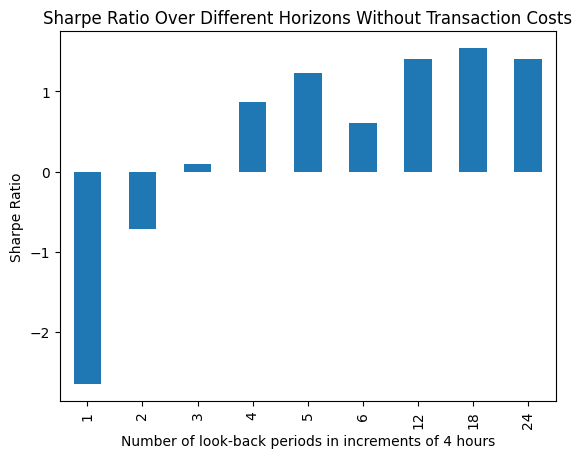

In [13]:
strat_1_gross_sr.plot(kind="bar", title="Sharpe Ratio Over Different Horizons Without Transaction Costs",
                xlabel="Number of look-back periods in increments of 4 hours",
                ylabel="Sharpe Ratio")

As we saw in the lectures, when we ignore transaction costs, we observe reversal at lower granularities (4 hours and 8 hours) but momentum at higher granularities (12 hours and higher).

In [14]:
def get_strat_1_annual_sr(strat_1_ret):
    yearly_resample = strat_1_ret.resample('YE')
    return yearly_resample.mean() / yearly_resample.std() * np.sqrt(365 * 24 / 4)

strat_1_gross_annual_sr = get_strat_1_annual_sr(strat_1_gross_daily_ret)
strat_1_gross_annual_sr

,1,2,3,4,5,6,12,18,24
2020-12-31,-3.848973,-3.929144,-1.972403,-0.150801,0.931690,-0.934529,1.385555,1.262651,1.618204
2021-12-31,-1.619153,2.232237,2.724654,2.696765,2.947196,2.088487,2.158285,2.787853,2.450617
2022-12-31,-4.248749,-2.326282,-1.958102,-0.670873,-0.582913,-0.932779,0.343887,0.992499,0.547970
2023-12-31,-1.446593,-0.012718,-0.153086,0.246768,0.935695,1.083398,1.884401,1.142865,0.721788
2024-12-31,-3.195714,-1.540009,-0.043546,0.848687,0.595175,1.149194,1.076726,0.848918,0.962606
2025-12-31,-2.944591,3.359649,-2.181039,6.559675,1.238275,2.769779,4.236879,2.383542,0.279083


<Axes: title={'center': 'Sharpe Ratio Over Different Time Horizons Grouped By Year'}, xlabel='Year, number of lookback periods in increments of 4 hours', ylabel='Sharpe Ratio'>

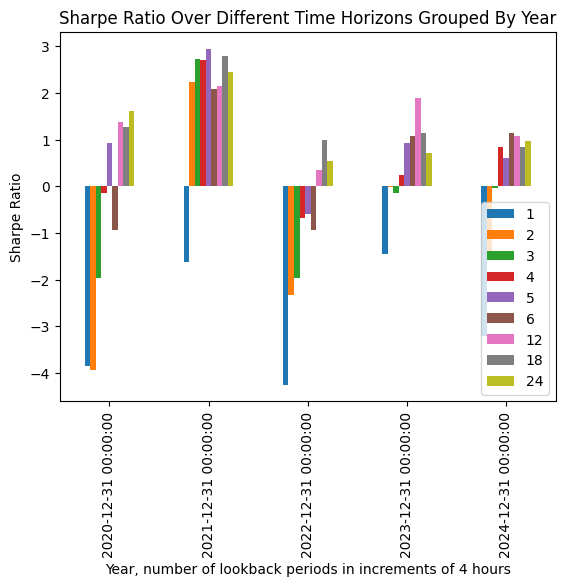

In [15]:
# Omit data from 2025 so far since it is likely too volatile to be useful over less than five days
strat_1_gross_annual_sr.iloc[:-1].plot(kind='bar',
                                       title="Sharpe Ratio Over Different Time Horizons Grouped By Year",
                                       xlabel="Year, number of lookback periods in increments of 4 hours",
                                       ylabel="Sharpe Ratio")

The strategy using a window of t=18 (3 days) seems to have a decent sharpe ratio overall (1.54) prior to
transaction costs.

### Strategy 1 With Transaction Costs

In [16]:
strat_1_net_daily_ret = get_strat_1_net_returns(strat_1_holdings, ret)
strat_1_net_daily_ret

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281
2020-01-01 12:00:00,-0.000485,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224
2020-01-01 16:00:00,-0.001334,-0.001384,0.001784,0.001784,0.001784,0.001784,0.001784,0.001784,0.001784
...,...,...,...,...,...,...,...,...,...
2025-01-07 04:00:00,-0.004771,-0.003616,-0.003158,-0.005362,-0.003685,-0.003515,0.001680,-0.005169,-0.000148
2025-01-07 08:00:00,0.004832,0.004832,-0.002924,0.003209,0.001963,0.002282,-0.004677,0.001155,0.001066
2025-01-07 12:00:00,-0.013288,-0.009556,-0.004926,-0.003061,-0.007876,-0.003913,-0.004554,-0.004671,-0.008017
2025-01-07 16:00:00,0.002840,0.000449,-0.001682,-0.002372,-0.000098,-0.002017,0.001593,-0.000214,0.000639


In [17]:
strat_1_net_sr = get_strat_1_sr(strat_1_net_daily_ret)
strat_1_net_sr

1    -20.726715
2    -13.348409
3    -10.409150
4     -8.114148
5     -6.965434
6     -6.901079
12    -3.973447
18    -2.879153
24    -2.366212
dtype: float64

<Axes: title={'center': 'Sharpe Ratio For Strategy 1 Over Different Time Horizons'}>

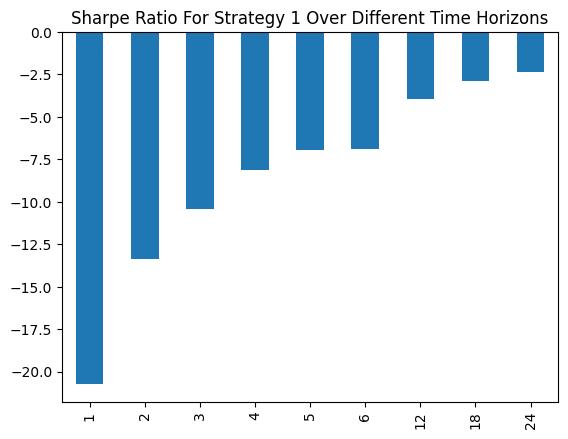

In [18]:
strat_1_net_sr.plot(kind='bar', title='Sharpe Ratio For Strategy 1 Over Different Time Horizons')

In [19]:
strat_1_annual_net_sr = get_strat_1_annual_sr(strat_1_net_daily_ret)
strat_1_annual_net_sr

,1,2,3,4,5,6,12,18,24
2020-12-31,-21.031334,-15.876341,-12.148299,-8.827155,-7.039332,-8.455215,-3.844958,-2.983348,-1.937347
2021-12-31,-13.451890,-5.703690,-3.803441,-2.787537,-2.003517,-2.446949,-1.125253,0.094664,0.260063
2022-12-31,-27.725324,-19.434049,-16.117718,-12.932315,-11.718566,-10.854681,-6.747374,-4.759926,-4.681088
2023-12-31,-28.993467,-20.106422,-17.059185,-14.046659,-11.807085,-10.529522,-6.491970,-5.637473,-5.274245
2024-12-31,-26.597023,-18.965743,-14.252453,-11.360359,-10.804976,-9.221851,-6.346870,-5.174634,-4.317617
2025-12-31,-24.326155,-13.473041,-16.688534,-5.742033,-10.334424,-7.536648,-4.134402,-4.036638,-4.969379


<Axes: title={'center': 'Strat 1: Net Sharpe Ratios Over Different Time Horizons Grouped By Year'}>

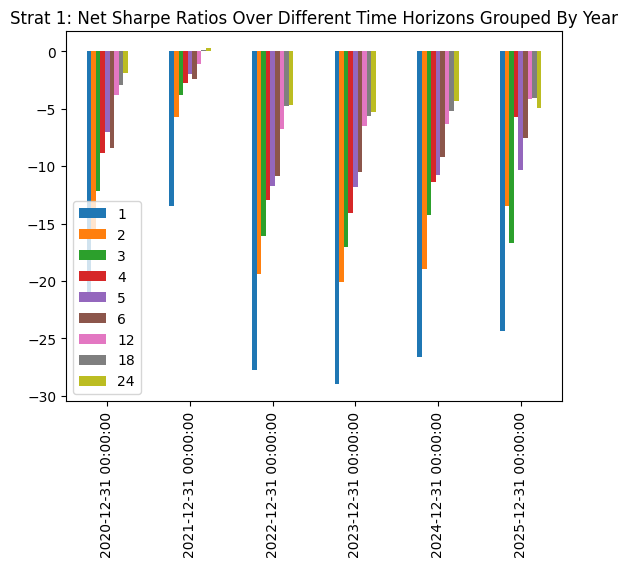

In [20]:
strat_1_annual_net_sr.plot(kind='bar',
                           title='Strat 1: Net Sharpe Ratios Over Different Time Horizons Grouped By Year')

When transaction costs are taken into account, the strategy is no longer profitable.

## Strategy 2: Testing Different Time Horizons For Momentum And Reversal -- Top Coins And Bottom Coins

Similarly to strategy 1, long high-performing coins based on average 
returns and short low-performing coins averaged over different intervals
but only do this for the top 2 and bottom 2 coins. This is similar to 
the strategy from the course where only the top and bottom deciles were
kept in the portfolio.

In [21]:
def get_strat_2_signal(ret, window_look_back):
    rolling_ranks = ret.rolling(window=window_look_back, min_periods=1).mean().rank(axis=1)
    rolling_pct_ranks = ret.rolling(window=window_look_back, min_periods=1).mean().rank(axis=1, pct=True)
    positions = ((rolling_pct_ranks > 0.81) | (rolling_pct_ranks < 0.26))
    demeaned_positions = rolling_ranks[positions].subtract(rolling_ranks[positions].mean(axis=1), axis=0)
    return demeaned_positions.divide(demeaned_positions.abs().sum(axis=1), axis=0).fillna(0)

In [22]:
get_strat_2_signal(ret, 3)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,-0.500000,0.500000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000000,0.500000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000
2020-01-01 12:00:00,0.000000,0.000000,0.500000,-0.500000,0.000000,0.000000,0.000000,0.000000
2020-01-01 16:00:00,0.000000,0.000000,0.500000,-0.500000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2025-01-07 04:00:00,0.208333,0.000000,0.000000,0.000000,0.291667,0.000000,-0.291667,-0.208333
2025-01-07 08:00:00,0.000000,0.000000,0.291667,0.000000,0.208333,0.000000,-0.291667,-0.208333
2025-01-07 12:00:00,0.000000,-0.208333,0.000000,0.291667,0.208333,0.000000,-0.291667,0.000000
2025-01-07 16:00:00,0.208333,0.000000,-0.208333,0.291667,0.000000,-0.291667,0.000000,0.000000


In [23]:
def get_strat_2_signal_time_horizon_dict(ret):
    strat_2_signals_data = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_2_signals_data[t] = get_strat_2_signal(ret, t)
    
    return strat_2_signals_data

strat_2_signals_data = get_strat_2_signal_time_horizon_dict(ret)
strat_2_signals_data[2]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,-0.500000,0.500000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000000,0.500000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000
2020-01-01 12:00:00,0.000000,0.000000,0.500000,0.000000,-0.500000,0.000000,0.000000,0.000000
2020-01-01 16:00:00,0.000000,0.000000,0.500000,-0.500000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2025-01-07 04:00:00,0.000000,0.000000,0.291667,0.000000,0.208333,0.000000,-0.291667,-0.208333
2025-01-07 08:00:00,0.000000,-0.291667,0.291667,0.000000,0.208333,0.000000,0.000000,-0.208333
2025-01-07 12:00:00,0.000000,0.000000,0.000000,0.291667,0.000000,-0.208333,-0.291667,0.208333
2025-01-07 16:00:00,0.291667,0.000000,-0.291667,0.208333,0.000000,-0.208333,0.000000,0.000000


In [24]:
def get_strat_2_gross_returns(strat_2_signals_data, ret):
    strat_2_gross_returns_data = dict()
    for t in strat_2_signals_data:
        strat_2_gross_returns_data[t] = (strat_2_signals_data[t].shift() * ret).sum(axis=1)
    return pd.DataFrame(strat_2_gross_returns_data)

strat_2_gross_returns_df = get_strat_2_gross_returns(strat_2_signals_data, ret)
strat_2_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333
2020-01-01 12:00:00,0.002013,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920
2020-01-01 16:00:00,-0.000588,-0.000588,0.003089,0.003089,0.003089,0.003089,0.003089,0.003089,0.003089
...,...,...,...,...,...,...,...,...,...
2025-01-07 04:00:00,-0.001563,-0.001376,-0.001353,-0.002166,-0.004330,0.000123,0.005420,-0.005008,-0.001256
2025-01-07 08:00:00,0.009186,0.009186,-0.001200,0.007852,0.004771,0.004771,-0.001123,0.004190,-0.000999
2025-01-07 12:00:00,-0.016368,-0.010539,-0.005934,-0.005934,-0.008007,-0.005752,-0.009041,-0.008898,-0.011121
2025-01-07 16:00:00,0.005830,0.002680,0.000077,-0.003056,0.002926,-0.002004,0.001875,0.003404,0.004669


In [25]:
def get_strat_2_net_returns(strat_2_signals_data, ret):
    strat_2_net_returns_dict = dict()
    for t in strat_2_signals_data:
        strat_2_net_returns_dict[t] = get_net_return(strat_2_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_2_net_returns_dict)

strat_2_net_returns_df = get_strat_2_net_returns(strat_2_signals_data, ret)
strat_2_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333
2020-01-01 12:00:00,-0.001987,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080
2020-01-01 16:00:00,-0.002588,-0.004588,0.001089,0.001089,0.001089,0.001089,0.001089,0.001089,0.001089
...,...,...,...,...,...,...,...,...,...
2025-01-07 04:00:00,-0.005563,-0.005376,-0.003687,-0.004166,-0.004663,-0.001877,0.003420,-0.005008,-0.001256
2025-01-07 08:00:00,0.006353,0.006353,-0.004367,0.004685,0.001938,0.002771,-0.001956,0.002190,-0.003832
2025-01-07 12:00:00,-0.019201,-0.011706,-0.007101,-0.008268,-0.010340,-0.006419,-0.011041,-0.010398,-0.013455
2025-01-07 16:00:00,0.001830,-0.001320,-0.001923,-0.005056,-0.000240,-0.004338,-0.000458,0.000237,0.001503


In [26]:
def get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, periods_per_day):
    strat_2_results_stats = dict()
    strat_2_results_stats["gross_mean"] = strat_2_gross_returns_df.mean() * 365 * periods_per_day
    strat_2_results_stats["net_mean"] = strat_2_net_returns_df.mean() * 365 * periods_per_day
    strat_2_results_stats["gross_std"] = strat_2_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_2_results_stats["net_std"] = strat_2_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_2_results_stats["gross_sr"] = strat_2_results_stats["gross_mean"] / strat_2_results_stats["net_mean"]
    strat_2_results_stats["net_sr"] = strat_2_results_stats["net_mean"] / strat_2_results_stats["net_std"]
    
    strat_2_results_stats_df = pd.DataFrame(strat_2_results_stats)
    return strat_2_results_stats_df
    
get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, 6)

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-1.142073,-8.082063,0.451510,0.454742,0.141310,-17.772838
2,-0.310165,-5.448694,0.451437,0.455943,0.056925,-11.950382
3,-0.001418,-4.328274,0.460924,0.466281,0.000328,-9.282541
4,0.381252,-3.410268,0.465370,0.469588,-0.111795,-7.262263
5,0.517362,-2.883172,0.458294,0.461053,-0.179442,-6.253450
6,0.338058,-2.811480,0.464879,0.468656,-0.120242,-5.999026
12,0.548809,-1.741963,0.472076,0.474588,-0.315052,-3.670478
18,0.521932,-1.341479,0.461870,0.464666,-0.389072,-2.886972
24,0.592277,-1.022279,0.462259,0.465247,-0.579370,-2.197280


In [27]:
def get_strat_2_results(ret, periods_per_day):
    strat_2_signals_data = get_strat_2_signal_time_horizon_dict(ret)
    strat_2_gross_returns_df = get_strat_2_gross_returns(strat_2_signals_data, ret)
    strat_2_net_returns_df = get_strat_2_net_returns(strat_2_signals_data, ret)
    return get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, periods_per_day)

In [28]:
# Rebalance every 4 hours

strat_2_4hr_trades = get_strat_2_results(ret, 6)
strat_2_4hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-1.142073,-8.082063,0.451510,0.454742,0.141310,-17.772838
2,-0.310165,-5.448694,0.451437,0.455943,0.056925,-11.950382
3,-0.001418,-4.328274,0.460924,0.466281,0.000328,-9.282541
4,0.381252,-3.410268,0.465370,0.469588,-0.111795,-7.262263
5,0.517362,-2.883172,0.458294,0.461053,-0.179442,-6.253450
6,0.338058,-2.811480,0.464879,0.468656,-0.120242,-5.999026
12,0.548809,-1.741963,0.472076,0.474588,-0.315052,-3.670478
18,0.521932,-1.341479,0.461870,0.464666,-0.389072,-2.886972
24,0.592277,-1.022279,0.462259,0.465247,-0.579370,-2.197280


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

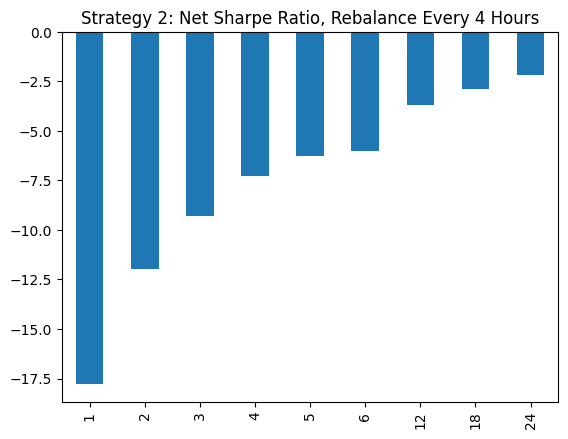

In [29]:
strat_2_4hr_trades["net_sr"].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [30]:
# Rebalance every 8 hours

strat_2_8hr_trades = get_strat_2_results(ret.iloc[::2], 3)
strat_2_8hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.271378,-3.099390,0.328516,0.331389,-0.087558,-9.352719
2,0.418670,-2.047070,0.320319,0.322178,-0.204522,-6.353840
3,0.316960,-1.728145,0.335415,0.337866,-0.183411,-5.114885
4,0.474624,-1.292317,0.329768,0.331872,-0.367266,-3.894016
5,0.518180,-1.096859,0.333890,0.335951,-0.472422,-3.264935
6,0.574554,-0.874521,0.336033,0.337263,-0.656992,-2.592996
12,0.432963,-0.580090,0.318755,0.320477,-0.746371,-1.810083
18,0.323990,-0.516492,0.326789,0.328267,-0.627289,-1.573390
24,0.349380,-0.367892,0.331051,0.332149,-0.949682,-1.107612


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

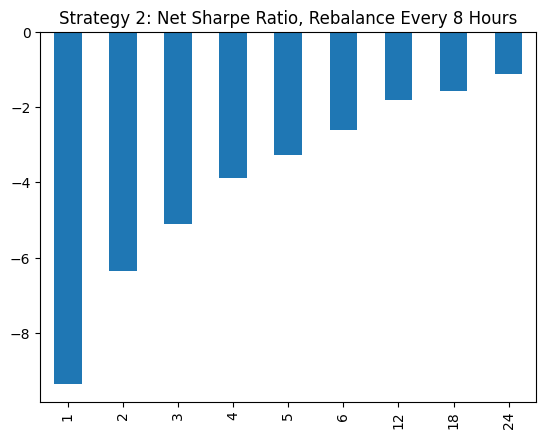

In [31]:
strat_2_8hr_trades["net_sr"].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [32]:
# Rebalance every 12 hours

strat_2_12hr_trades = get_strat_2_results(ret.iloc[::3], 2)
strat_2_12hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.293507,-1.935576,0.267633,0.268816,-0.151638,-7.200387
2,0.106681,-1.546427,0.274392,0.275601,-0.068986,-5.611107
3,0.088643,-1.271136,0.272406,0.274428,-0.069736,-4.631945
4,0.181967,-0.987149,0.274289,0.275108,-0.184336,-3.588220
5,0.115291,-0.954804,0.275432,0.277202,-0.120749,-3.444434
6,0.073455,-0.909413,0.275220,0.276447,-0.080772,-3.289641
12,0.068163,-0.640364,0.264275,0.265433,-0.106445,-2.412523
18,0.039844,-0.551386,0.267200,0.268022,-0.072262,-2.057237
24,0.164102,-0.344963,0.280715,0.281251,-0.475709,-1.226533


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

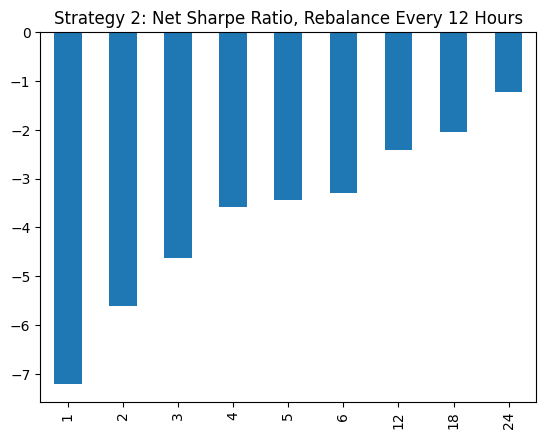

In [33]:
strat_2_12hr_trades['net_sr'].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 12 Hours')

In [34]:
# Rebalance once a day
strat_2_1d_trades = get_strat_2_results(ret.iloc[::6], 1)
strat_2_1d_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.019804,-1.106391,0.180745,0.181919,-0.017900,-6.081769
2,0.085774,-0.729014,0.182256,0.184107,-0.117657,-3.959736
3,0.123208,-0.553757,0.180537,0.182033,-0.222494,-3.042069
4,-0.009726,-0.615577,0.180233,0.182543,0.015799,-3.372231
5,0.081058,-0.455029,0.182875,0.184279,-0.178137,-2.469242
6,0.100636,-0.388974,0.182900,0.184772,-0.258722,-2.105154
12,0.067370,-0.275566,0.190545,0.192942,-0.244478,-1.428233
18,0.121055,-0.155843,0.190221,0.191909,-0.776775,-0.812068
24,0.110211,-0.139971,0.189982,0.191668,-0.787384,-0.730277


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Once A Day'}>

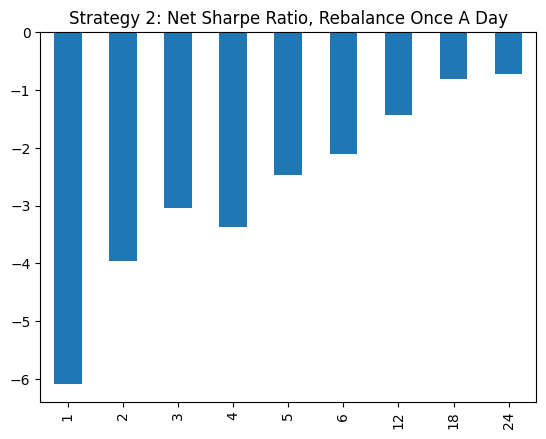

In [35]:
strat_2_1d_trades['net_sr'].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Once A Day')

In [97]:
# Rebalance once every two days

strat_2_2d_trades = get_strat_2_results(ret.iloc[::12], 0.5)
strat_2_2d_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.039046,-0.527074,0.130728,0.130635,-0.074082,-4.034693
2,-0.028758,-0.444520,0.129099,0.129126,0.064695,-3.442515
3,0.024622,-0.309699,0.130559,0.132029,-0.079503,-2.345681
4,-0.023210,-0.315952,0.133932,0.135581,0.073462,-2.330353
5,-0.032507,-0.293100,0.133137,0.133986,0.110906,-2.187546
6,0.002366,-0.236933,0.139073,0.140513,-0.009985,-1.686200
12,-0.008953,-0.189972,0.131505,0.131976,0.047127,-1.439450
18,0.027476,-0.110136,0.129274,0.130180,-0.249475,-0.846027
24,0.040551,-0.079098,0.119662,0.119883,-0.512664,-0.659799


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Once Every Two Days'}>

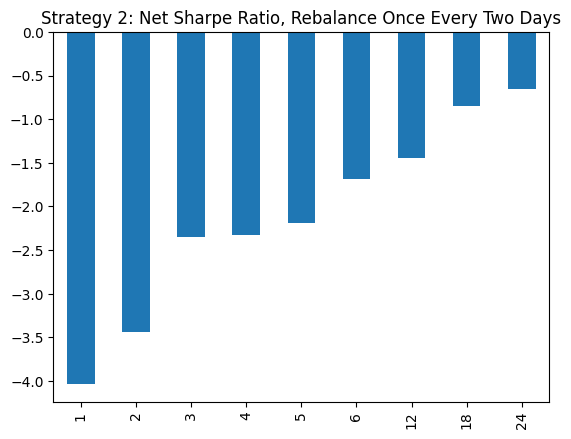

In [37]:
strat_2_2d_trades['net_sr'].plot(kind='bar',
                                 title='Strategy 2: Net Sharpe Ratio, Rebalance Once Every Two Days')

## Strategy 3: Testing With The Most Recent Interval Removed

Similar to strategy 1: difference is to not include most recent 
period in rolling window.

In [64]:
def get_strat_3_signal(ret, window_look_back):
    ranked_avgs = ret.rolling(window=window_look_back, min_periods=1).mean().shift().rank(axis=1)
    demeaned_ranked_avgs = ranked_avgs.subtract(ranked_avgs.mean(axis=1), axis=0)
    return demeaned_ranked_avgs.divide(demeaned_ranked_avgs.abs().sum(axis=1), axis=0)

get_strat_3_signal(ret, 4)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-07 04:00:00,0.218750,0.093750,-0.093750,0.156250,-0.218750,-0.03125,-0.15625,0.03125
2025-01-07 08:00:00,0.031250,-0.093750,0.156250,0.218750,0.093750,-0.15625,-0.03125,-0.21875
2025-01-07 12:00:00,0.031250,-0.093750,0.218750,0.093750,0.156250,-0.03125,-0.21875,-0.15625
2025-01-07 16:00:00,0.031250,-0.156250,0.156250,0.218750,0.093750,-0.09375,-0.21875,-0.03125


In [65]:
def get_strat_3_signal_time_horizon_dict(ret):
    strat_3_signal_dict = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_3_signal_dict[t] = get_strat_3_signal(ret, t)
    return strat_3_signal_dict

strat_3_signals_data = get_strat_3_signal_time_horizon_dict(ret)
strat_3_signals_data[4]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-07 04:00:00,0.218750,0.093750,-0.093750,0.156250,-0.218750,-0.03125,-0.15625,0.03125
2025-01-07 08:00:00,0.031250,-0.093750,0.156250,0.218750,0.093750,-0.15625,-0.03125,-0.21875
2025-01-07 12:00:00,0.031250,-0.093750,0.218750,0.093750,0.156250,-0.03125,-0.21875,-0.15625
2025-01-07 16:00:00,0.031250,-0.156250,0.156250,0.218750,0.093750,-0.09375,-0.21875,-0.03125


In [66]:
def get_strat_3_gross_returns(strat_3_signals_data, ret):
    strat_3_gross_returns_data = dict()
    for t in strat_3_signals_data:
        strat_3_gross_returns_data[t] = (strat_3_signals_data[t] * ret).sum(axis=1)
    return pd.DataFrame(strat_3_gross_returns_data)

strat_3_gross_returns_df = get_strat_3_gross_returns(strat_3_signals_data, ret)
strat_3_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-1.281039e-03,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281
2020-01-01 12:00:00,2.181741e-03,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558
2020-01-01 16:00:00,-7.816796e-07,0.000616,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451
...,...,...,...,...,...,...,...,...,...
2025-01-07 04:00:00,-2.020782e-03,-0.000866,-0.001658,-0.003362,-0.002685,-0.002015,0.003180,-0.004919,-0.000148
2025-01-07 08:00:00,7.582199e-03,0.007582,-0.000424,0.006209,0.004213,0.004282,-0.003677,0.002905,0.002316
2025-01-07 12:00:00,-1.128825e-02,-0.008806,-0.003176,-0.001811,-0.006126,-0.003163,-0.003054,-0.003421,-0.006017
2025-01-07 16:00:00,6.090294e-03,0.003699,-0.000432,-0.001372,0.001902,-0.000517,0.003343,0.001786,0.002389


In [67]:
def get_strat_3_net_returns(strat_3_signals_data, ret):
    strat_3_net_returns_data = dict()
    for t in strat_3_signals_data:
        strat_3_net_returns_data[t] = get_net_return(strat_3_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_3_net_returns_data)

strat_3_net_returns_df = get_strat_3_net_returns(strat_3_signals_data, ret)
strat_3_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 12:00:00,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784
2020-01-01 16:00:00,-0.002072,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096
...,...,...,...,...,...,...,...,...,...
2025-01-07 04:00:00,-0.006216,-0.003806,-0.007309,-0.004147,-0.005560,-0.006572,-0.002192,-0.004069,-0.000648
2025-01-07 08:00:00,-0.007717,-0.009996,0.000252,-0.006993,-0.001276,-0.004136,0.002613,-0.005067,0.007068
2025-01-07 12:00:00,-0.007601,-0.007601,0.001072,-0.003662,-0.000784,0.000562,0.007532,-0.000281,-0.011037
2025-01-07 16:00:00,-0.005725,-0.006028,-0.007346,-0.005718,-0.004738,-0.004425,-0.004360,-0.004780,-0.005410


In [83]:
def get_strat_3_results_stats(strat_3_gross_returns_df, strat_3_net_returns_df, periods_per_day):
    strat_3_results_stats_data = dict()
    strat_3_results_stats_data["gross_mean"] = strat_3_gross_returns_df.mean() * 365 * periods_per_day
    strat_3_results_stats_data["net_mean"] = strat_3_net_returns_df.mean() * 365 * periods_per_day
    strat_3_results_stats_data["gross_std"] = strat_3_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_3_results_stats_data["net_std"] = strat_3_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_3_results_stats_data["gross_sr"] = \
        strat_3_results_stats_data["gross_mean"] / strat_3_results_stats_data["gross_std"]
    strat_3_results_stats_data["net_sr"] = \
        strat_3_results_stats_data["net_mean"] / strat_3_results_stats_data["net_std"]
    
    return pd.DataFrame(strat_3_results_stats_data)

get_strat_3_results_stats(strat_3_gross_returns_df, strat_3_net_returns_df, 6)

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-0.863546,-5.612846,0.325808,0.328757,-2.650475,-17.072917
2,-0.237942,-3.722380,0.332116,0.327819,-0.716442,-11.354976
3,0.032829,-2.784880,0.333055,0.331829,0.098569,-8.392506
4,0.295249,-2.358259,0.340386,0.332352,0.867394,-7.095671
5,0.412612,-2.275893,0.336719,0.333953,1.225391,-6.815015
6,0.205875,-2.044575,0.339341,0.330072,0.606692,-6.194328
12,0.476025,-1.221515,0.337848,0.333126,1.408992,-3.666825
18,0.513510,-0.833997,0.333582,0.329535,1.539382,-2.530831
24,0.475266,-0.677243,0.337624,0.334088,1.407680,-2.027136


In [84]:
def get_strat_3_results(ret, periods_per_day):
    strat_3_signals_data = get_strat_3_signal_time_horizon_dict(ret)
    strat_3_gross_rets_df = get_strat_3_gross_returns(strat_3_signals_data, ret)
    strat_3_net_rets_df = get_strat_3_net_returns(strat_3_signals_data, ret)
    return get_strat_3_results_stats(strat_3_gross_rets_df, strat_3_net_rets_df, periods_per_day)

In [85]:
# Rebalance every 4 hours
strat_3_4hr_results = get_strat_3_results(ret, 6)
strat_3_4hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-0.863546,-5.612846,0.325808,0.328757,-2.650475,-17.072917
2,-0.237942,-3.722380,0.332116,0.327819,-0.716442,-11.354976
3,0.032829,-2.784880,0.333055,0.331829,0.098569,-8.392506
4,0.295249,-2.358259,0.340386,0.332352,0.867394,-7.095671
5,0.412612,-2.275893,0.336719,0.333953,1.225391,-6.815015
6,0.205875,-2.044575,0.339341,0.330072,0.606692,-6.194328
12,0.476025,-1.221515,0.337848,0.333126,1.408992,-3.666825
18,0.513510,-0.833997,0.333582,0.329535,1.539382,-2.530831
24,0.475266,-0.677243,0.337624,0.334088,1.407680,-2.027136


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

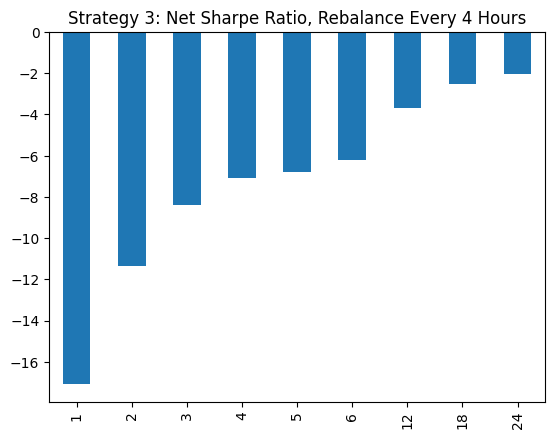

In [86]:
strat_3_4hr_results['net_sr'].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [92]:
# Rebalance every 8 hours

strat_3_8hr_results = get_strat_3_results(ret.iloc[::2], 3)
strat_3_8hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.198698,-2.618622,0.238146,0.229100,0.834352,-11.430062
2,0.288330,-1.875222,0.234363,0.239857,1.230271,-7.818097
3,0.235719,-1.483501,0.243907,0.240780,0.966427,-6.161222
4,0.325876,-1.280025,0.240963,0.238498,1.352392,-5.367023
5,0.414014,-1.045000,0.242647,0.240801,1.706237,-4.339679
6,0.421457,-0.918686,0.241975,0.236096,1.741738,-3.891158
12,0.306318,-0.642827,0.230688,0.232519,1.327845,-2.764623
18,0.204035,-0.527820,0.237291,0.233920,0.859850,-2.256417
24,0.289649,-0.422348,0.238103,0.235675,1.216484,-1.792076


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

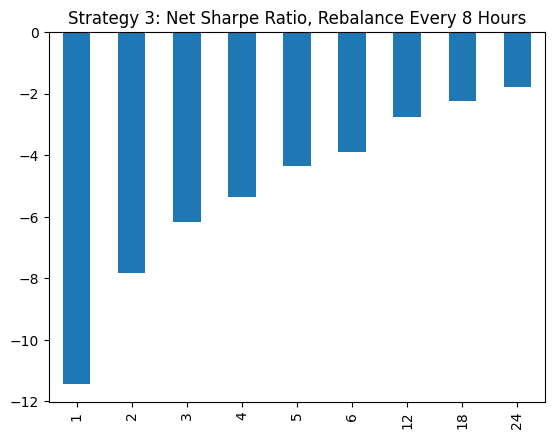

In [93]:
strat_3_8hr_results["net_sr"].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [94]:
# Rebalance every 12 hours

strat_3_12hr_results = get_strat_3_results(ret.iloc[::3], 2)
strat_3_12hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.213872,-1.967634,0.196447,0.199203,1.088699,-9.877548
2,0.082025,-1.391820,0.199882,0.206041,0.410368,-6.755055
3,0.070205,-1.139007,0.199638,0.198935,0.351663,-5.725518
4,0.105921,-1.032380,0.200777,0.203781,0.527557,-5.066122
5,0.057983,-0.908024,0.201865,0.203772,0.287236,-4.456084
6,0.050050,-0.832138,0.201681,0.202311,0.248165,-4.113160
12,0.074250,-0.598023,0.193981,0.194574,0.382771,-3.073501
18,0.028506,-0.440915,0.196489,0.200429,0.145077,-2.199851
24,0.153688,-0.363990,0.202697,0.199746,0.758217,-1.822261


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

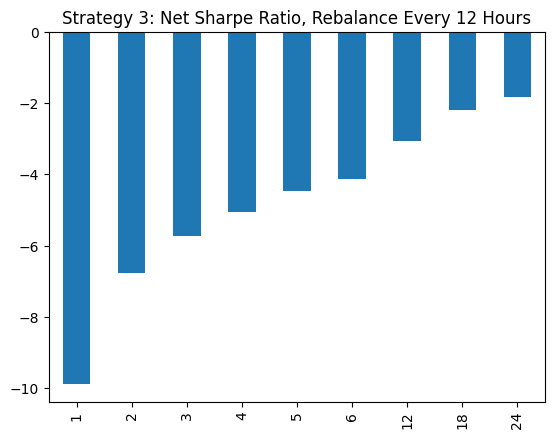

In [96]:
strat_3_12hr_results["net_sr"].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 12 Hours')

In [106]:
# Rebalance once a day

strat_3_1d_results = get_strat_3_results(ret.iloc[::6], 1)
strat_3_1d_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.007576,-0.876332,0.135618,0.129970,0.055863,-6.742580
2,0.084065,-0.550588,0.132181,0.129534,0.635982,-4.250535
3,0.057976,-0.478578,0.132145,0.127016,0.438728,-3.767868
4,-0.005204,-0.408221,0.128690,0.128146,-0.040439,-3.185581
5,0.024309,-0.329161,0.130809,0.132422,0.185833,-2.485691
6,0.045342,-0.277673,0.132958,0.132139,0.341021,-2.101367
12,0.051358,-0.139220,0.138790,0.128192,0.370044,-1.086023
18,0.108578,-0.103105,0.136556,0.133741,0.795116,-0.770930
24,0.095874,-0.074668,0.134795,0.129859,0.711255,-0.574998


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Once A Day'}>

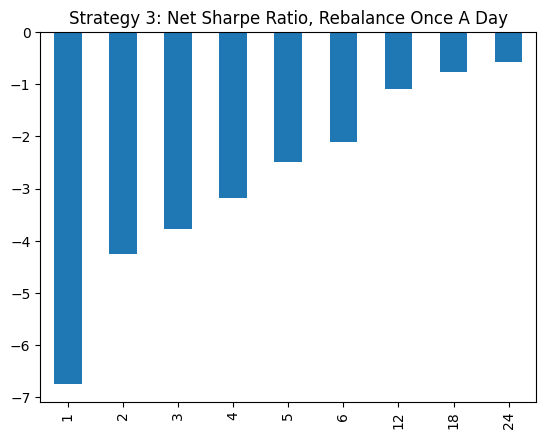

In [107]:
strat_3_1d_results['net_sr'].plot(kind='bar', title="Strategy 3: Net Sharpe Ratio, Rebalance Once A Day")

In [109]:
strat_3_2d_results = get_strat_3_results(ret.iloc[::12], 0.5)
strat_3_2d_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.065928,-0.443755,0.096418,0.094632,0.683772,-4.689287
2,0.037749,-0.353086,0.096082,0.094393,0.392882,-3.740573
3,0.031363,-0.292732,0.097358,0.091588,0.322137,-3.196185
4,-0.016046,-0.265393,0.094714,0.089841,-0.169411,-2.954026
5,-0.015653,-0.217807,0.096257,0.098430,-0.162614,-2.212815
6,-0.006021,-0.208880,0.099043,0.100518,-0.060787,-2.078028
12,0.010748,-0.122213,0.099835,0.096041,0.107654,-1.272513
18,0.042882,-0.074589,0.094920,0.095640,0.451767,-0.779891
24,0.030154,-0.050263,0.097547,0.097412,0.309122,-0.515984


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Once Every Two Days'}>

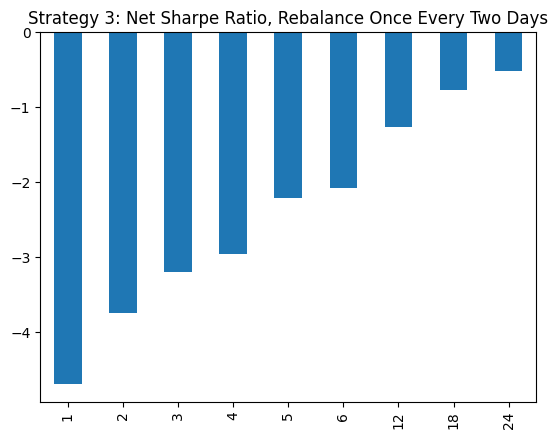

In [110]:
strat_3_2d_results['net_sr'].plot(kind='bar',
                                  title='Strategy 3: Net Sharpe Ratio, Rebalance Once Every Two Days')

## Strategy 4: Trade Around Periods Of High Volume With New Information

Use high volume as a signal for high activity. When this is coupled with activity (e.g. look up on Twitter), then this could combine to yield momentum.

## Strategy 5: Pairs Trading For Cryptocurrencies (Reversal Strategy)

Observe the correlation between the different cryptocurrencies and try to apply pairs trading for highly correlated pairs.

## Strategy 6: Use XGBoost On Price Data And Volume Data

Fit a model with features taken using price data and volume data. Consider using principal component analysis.

## Strategy 7: Seasonality Across The Week

Look for seasonal patterns during the period of a week. Maybe there is similar activity consistently during:

  - weekdays versus during weekends
  - morning versus night
  - Fridays